In [1]:
#Step 1. 필요한 모듈을 실행합니다.
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter

okt = Okt()
kkma = Kkma( )

#Step 2. 텍스트 파일을 불러와서 형태소 분석을 합니다.
data1 = open("c:\\data\\파이썬_텍스트분석예제_1.txt").read( )
print(data1)

print("Kkma:",kkma.nouns("나는 사과, 사과 , 복숭아, 복숭아가 좋아요"))
print("okt:",okt.nouns("나는 사과, 사과 , 복숭아, 복숭아가 좋아요"))

In [100]:
#텍스트 파일을 다시 불러옵니다
data1 = open("c:\\data\\파이썬_텍스트분석예제_1.txt").readlines( )
print(data1)
print("\n")

# 각 줄별로 중복된 단어가 나올 경우 제거하기
data22=[]
for i in data1 :
        data2=kkma.nouns(i)
        for j in range(0,len(data2)) :
            data22.append(data2[j])
print(data22)

['나는 사과와 바나나가 제일 좋아요^^\n', '나는 역시 복숭아와 사과가 좋아요!\n', '나는 단감, 단감, 단감, 단감이 최고 좋아요!\n', '나는 토마토와 오렌지를 가장 좋아하죠\n']


['사과', '바나나', '나', '복숭아', '사과', '나', '단감', '최고', '나', '토마토', '오렌지']


In [101]:
print("\n")
data23 = Counter(data22)
print("단어별 빈도수:",data23)



단어별 빈도수: Counter({'나': 3, '사과': 2, '복숭아': 1, '바나나': 1, '최고': 1, '오렌지': 1, '단감': 1, '토마토': 1})


In [104]:
#Step 3. 키워드를 추출하고 빈도를 조사합니다
data1 = open("c:\\data\\파이썬_텍스트분석예제_1.txt").read( )
data2 = okt.nouns(data1)
#data2 = kkma.nouns(data1)
print("1.추출된 키워드:", data2)

print("\n")
data3 = Counter(data2)
print("2.단어별 빈도수:",data3)

1.추출된 키워드: ['나', '사과', '바나나', '제일', '나', '역시', '복숭아', '사과', '나', '단감', '단감', '단감', '단감', '최고', '나', '토마토', '오렌지', '가장']


2.단어별 빈도수: Counter({'나': 4, '단감': 4, '사과': 2, '제일': 1, '역시': 1, '바나나': 1, '가장': 1, '오렌지': 1, '최고': 1, '토마토': 1, '복숭아': 1})


In [56]:
okt.pos(data1)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('사과', 'Noun'),
 ('와', 'Josa'),
 ('바나나', 'Noun'),
 ('가', 'Josa'),
 ('제일', 'Noun'),
 ('좋아요', 'Adjective'),
 ('^^', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('역시', 'Noun'),
 ('복숭아', 'Noun'),
 ('와', 'Josa'),
 ('사과', 'Noun'),
 ('가', 'Josa'),
 ('좋아요', 'Adjective'),
 ('!', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 ('이', 'Josa'),
 ('최고', 'Noun'),
 ('좋아요', 'Adjective'),
 ('!', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('토마토', 'Noun'),
 ('와', 'Josa'),
 ('오렌지', 'Noun'),
 ('를', 'Josa'),
 ('가장', 'Noun'),
 ('좋아하죠', 'Adjective'),
 ('\n', 'Foreign')]

In [58]:
#Step 4. 불용어 제거하기
sword = open("c:\\data\\불용어목록.txt").read()
print(sword)
data4 = [ each_word for each_word in data2
          if each_word not in sword ]
print(data4)

최고
역시
가장
제일
나


['사과', '바나나', '복숭아', '사과', '단감', '단감', '단감', '단감', '토마토', '오렌지']


In [59]:
#글자수로 불용어 제거하기
data5 = []
for i in data4 :
    if len(i) >= 2 | len(i) <= 10 :
       data5.append(i) 
print(data5)

['사과', '바나나', '복숭아', '사과', '단감', '단감', '단감', '단감', '토마토', '오렌지']


In [52]:
# Step 5. 단어별 빈도수 집계하기
data6 = Counter(data5)
data7 = data6.most_common(10)
print(data7)
data8 = dict(data7)

[('단감', 4), ('사과', 2), ('복숭아', 1), ('바나나', 1), ('오렌지', 1), ('토마토', 1)]


In [ ]:
#Step 6. 워드 클라우드 그리기
wordcloud = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF" ,
                       relative_scaling=0.5,
                       background_color="white"
                     ).generate_from_frequencies(data8)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [2]:
# 완주 여행 키워드 분석
#Step 1. 필요한 모듈을 실행합니다.
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter

okt = Okt()
kkma = Kkma( )


#Step 2 . 텍스트 파일을 불러와서 형태소 분석을 합니다.
data1 = open("c:\\data\\완주여행_2017.txt").read( )
data1

print(data1)
print("\n")

#Step 3. 키워드를 추출합니다
data2 = okt.nouns(data1)
#data2 = kkma.nouns(data1)
print("1.추출된 키워드:", data2)
print(len(data2))

# Step 4. 용어 정리 작업하기
data3=[]
for a in data2 :
    if a == "와일드" or a=="축제":
        data3.append(a.replace("와일드","와일드푸드축제"))
    elif a=="로컬" :
        data3.append(a.replace("로컬","로컬푸드"))
    elif a=="메뚜기" :
        data3.append(a.replace("메뚜기","메뚜기구이"))
    elif a=="푸드" :
        data3.append(a.replace("푸드"," "))
    else :
        data3.append(a)
print(data3)

#Step 5. 추출된 단어들의 빈도를 조사한 후 많이 언급된 100개만 출력합니다
print("\n")
data4 = Counter(data3)
data5 = data4.most_common(100)

print("2.단어별 빈도수:",data5)

#Step 6. 불용어 제거하기
sword = open("c:\\data\\와푸gsub.txt").read()
#print(sword)
data6 = [ each_word for each_word in data3
          if each_word not in sword ]
print(data6)

#Step 7. 글자수로 불용어 제거하기
data7 = []
for i in data6 :
    if len(i) >= 2 and len(i) <= 10 :
        data7.append(i) 
print(data7)

# Step 8. 단어별 빈도수 집계하기
data8 = Counter(data7)
data9 = data8.most_common(100)
print(data9)
data10 = dict(data9)

#Step 9. 워드 클라우드 그리기
wordcloud = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF" ,
                       relative_scaling=0.4,
                       background_color="white"
                     ).generate_from_frequencies(data10)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

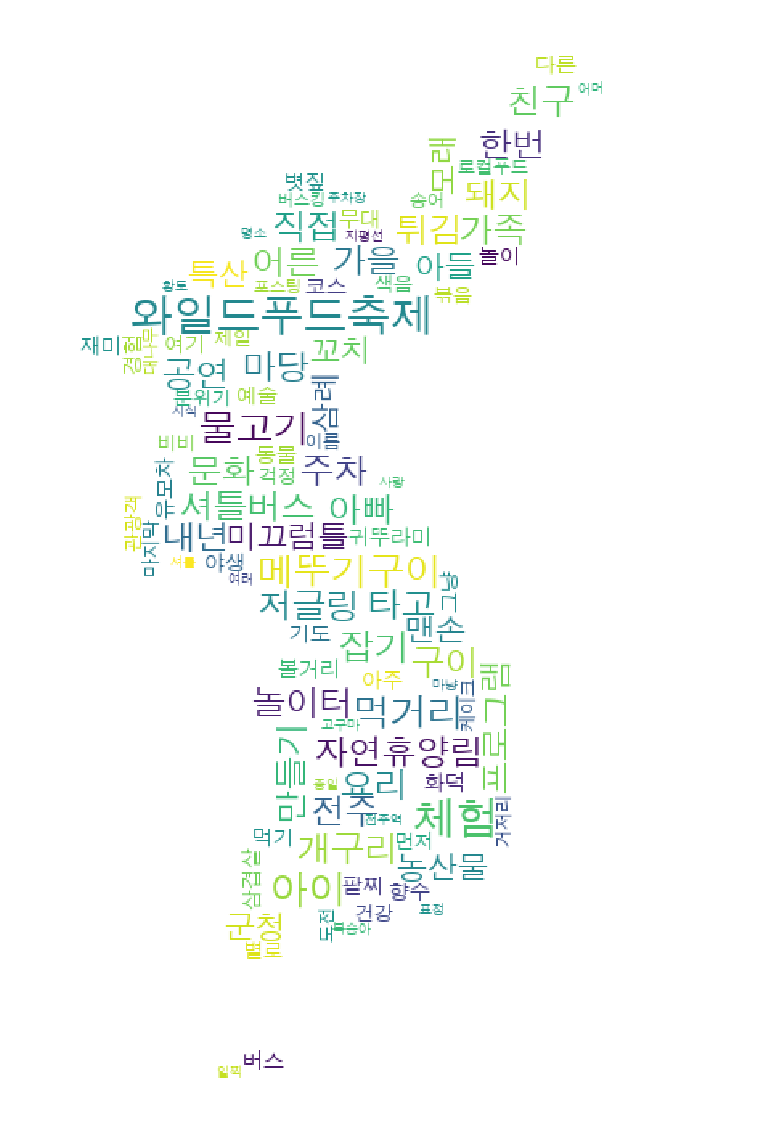

In [66]:
import numpy as np         # pip install numpy
from PIL import Image      # pip install Image
from wordcloud import ImageColorGenerator
korea = np.array(Image.open("c:\data\image\korea.jpg"))
wc = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF" ,
                       relative_scaling=0.2,mask = korea,
                       background_color="white",
                       min_font_size=1,
                       max_font_size=50,
                       max_words=500
                     ).generate_from_frequencies(data10)
plt.figure(figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

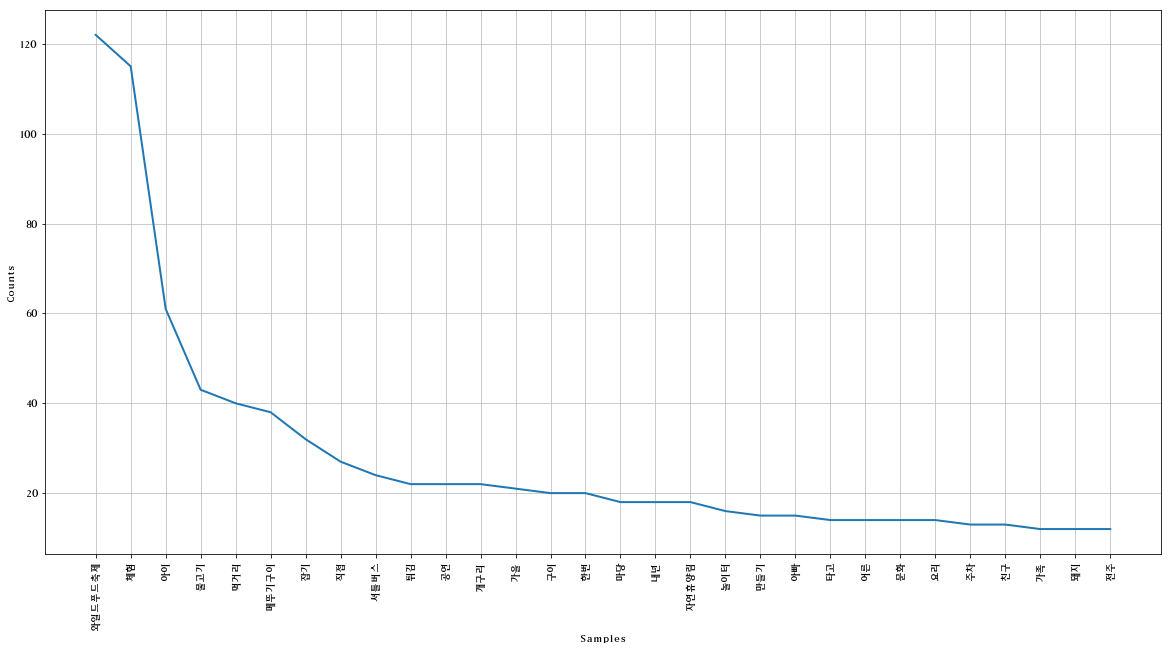

In [71]:
# Step 10. 주요 단어들의 빈도를 그래프로 표시하기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib 

font_location="c:\windows\Fonts\HYCYSM.TTF"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
plt.figure(figsize=(20,10))

import nltk
from nltk.probability import FreqDist

data11 = FreqDist(data7)
data11.plot(30)


In [26]:
# 영문 텍스트 분석 후 워드 클라우드로 시각화 하기

import nltk
#nltk.download( )   # 이 작업은 시간이 몇 분에서 몇십분 정도 소요됩니다.


In [27]:
# nltk 패키지가 잘 설치되었는지 테스트하기
from nltk.corpus import brown
brown.words()


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [12]:
# 분석할 예제 텍스트를 생성합니다.
data1 = '''I love apple, apple , and orange but hate cherry ,
           I don't love mange '''
data1

"I love apple, apple , and orange but hate cherry ,\n           I don't love mange "

In [13]:
# 예제 텍스트를 토큰화하기 - 단어별로 구분화하는 작업
data2 = nltk.word_tokenize(data1)
print(data2)

['I', 'love', 'apple', ',', 'apple', ',', 'and', 'orange', 'but', 'hate', 'cherry', ',', 'I', 'do', "n't", 'love', 'mange']


In [14]:
#word_tokenize( ) 함수는 축약형을 제대로 분리할 수 없음
# 그래서 아래의 함수를 추천함
from nltk.tokenize  import WordPunctTokenizer

tokenizer = WordPunctTokenizer( )
new_data2 = tokenizer.tokenize(data1)
print(new_data2)


['I', 'love', 'apple', ',', 'apple', ',', 'and', 'orange', 'but', 'hate', 'cherry', ',', 'I', 'don', "'", 't', 'love', 'mange']


In [20]:
# 축약형의 경우 축약된 단어를 하나의 단어로 인식시키고 싶을 경우
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer( "[\w']+") 
new_data3 = tokenizer.tokenize(data1)
print(new_data3)

['I', 'love', 'apple', 'apple', 'and', 'orange', 'but', 'hate', 'cherry', 'I', "don't", 'love', 'mange']


In [25]:
# 불용어 제거하기
from nltk.corpus import stopwords
data3 = [ each_word for each_word in new_data3
          if each_word not in stopwords.words() ]
print(data3)

['I', 'love', 'apple', 'apple', 'orange', 'hate', 'cherry', 'I', 'love']


In [29]:
# 사용자가 생성한 불용어 사전을 불러와서 불용어를 제거합니다.
sword2 = open("c:\\data\\stopword_list.txt").read()
print(sword2)
data4 = [ each_word for each_word in data3
          if each_word not in sword2 ]
print(data4)

hate
love

['I', 'apple', 'apple', 'orange', 'cherry', 'I']


In [30]:
# 글자수로 불용어 제거하기
data5 = []
for i in data4 :
    if len(i) >= 2 and len(i) <= 10 :
        data5.append(i) 
print(data5)

['apple', 'apple', 'orange', 'cherry']


In [31]:
# 단어별로 언급 빈도 조사합니다
from collections import Counter
data6 = Counter(data5)
print(data6)
data7 = data6.most_common(10)
print(data7)
data8 = dict(data7)
print(data8)

Counter({'apple': 2, 'cherry': 1, 'orange': 1})
[('apple', 2), ('cherry', 1), ('orange', 1)]
{'cherry': 1, 'orange': 1, 'apple': 2}


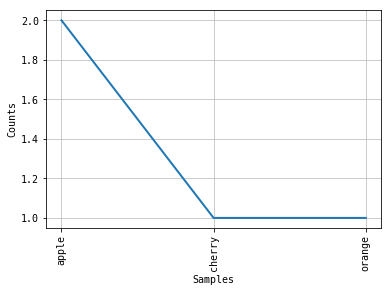

In [35]:
# 각 단어별 언급 빈도로 그래프 그리기
graph = nltk.Text(data5 , name ='각 단어별 언급빈도수')
graph.plot(10)

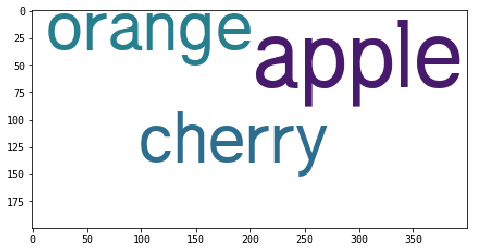

In [39]:
# 워드 클라우드로 시각화 하기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='c:\\windows\\fonts\HMKMG.TTF' ,
                      relative_scaling = 0.5 ,
                      background_color='white' ).generate_from_frequencies(data8)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()